<a href="https://colab.research.google.com/github/anniseraa/fsd/blob/main/TUBES_FSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Fertika Indri Dhamaningrum 24523160
*   Annisa Ramdhani 24523018



# **1. Latar Belakang**

**Studi Kasus : Klasifikasi Diagnosis Kanker Payudara**

**A. Mengapa Model ini Perlu Dibuat?**

Diagnosis kanker payudara secara konvensional seringkali melibatkan analisis mikroskopis yang memakan waktu dan bergantung pada keahlian serta penilaian subjektif patolog. Model ini dibuat untuk mengatasi tantangan tersebut:

Objektivitas: Mengurangi subjektivitas diagnosis dengan mengandalkan 30 pengukuran numerik dari sel.

Kecepatan: Memberikan prediksi awal yang cepat, yang krusial dalam kasus diagnosis kanker.

Dukungan Keputusan Klinis: Berfungsi sebagai alat pendukung keputusan klinis (Clinical Decision Support) untuk memprioritaskan pasien berisiko tinggi.

**B. Siapa yang akan Menggunakan Model tersebut?**

Model ini ditujukan untuk digunakan oleh laboratorium patologi, ahli onkologi, atau unit skrining awal di rumah sakit.

**C. Untuk Tujuan Apa Model tersebut Digunakan?**

Tujuan utamanya adalah melakukan klasifikasi biner untuk memprediksi apakah massa sel (tumor) bersifat Ganas (Malignant) atau Jinak (Benign) berdasarkan data biometrik.




# **2. Metode**


  **A. Dataset**

Sumber: Breast Cancer Wisconsin (Diagnostic) Dataset (sklearn.datasets.load_breast_cancer).

Jumlah Sampel: 569 sampel.

Fitur (X): 30 fitur kontinu (numerik) yang mencakup karakteristik nukleus sel (misalnya, mean radius, mean texture, worst perimeter, dll.).

Target (y): Variabel biner, di mana 0 = Ganas (kelas minoritas) dan 1 = Jinak (kelas mayoritas).

  **B. Algoritma: Gaussian Naive Bayes (GNB)**

Mengapa GNB? GNB dipilih karena fitur-fiturnya (pengukuran fisik) bersifat kontinu. GNB mengasumsikan bahwa distribusi probabilitas setiap fitur dalam setiap kelas (Ganas atau Jinak) mengikuti Distribusi Normal (Gaussian).

Prinsip Kerja: Selama pelatihan, GNB menghitung rata-rata ($\mu$) dan varians ($\sigma^2$) setiap dari 30 fitur untuk masing-masing kelas (Ganas dan Jinak). Saat memprediksi sampel baru, model menggunakan statistik ini untuk menghitung probabilitas sampel tersebut termasuk dalam kelas Ganas atau Jinak


**C. Langkah Pemrosesan Data**
Scaling (StandardScaler): Menerapkan normalisasi pada fitur-fitur, mengubah rata-rata setiap fitur menjadi 0 dan standar deviasi menjadi 1. Langkah ini penting untuk menstandarkan rentang fitur sehingga tidak ada fitur yang mendominasi model karena skalanya yang lebih besar.

Pembagian Data (train_test_split): Data dibagi menjadi 70% untuk Training dan 30% untuk Testing. Pembagian dilakukan dengan stratification (stratify=y) untuk memastikan rasio kelas Ganas/Jinak di set training dan testing tetap sama.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# 1. Memuat Dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

# --- GABUNGKAN FITUR (X) DAN TARGET (Y) ---
X_combined = X.copy()
X_combined['Diagnosis'] = y # 0: Malignant (Ganas), 1: Benign (Jinak)

# --- KONFIGURASI PANDAS UNTUK MENAMPILKAN SEMUA BARIS (569) & KOLOM ---
# Set display options untuk menonaktifkan batasan tampilan (hanya berlaku saat cetak)
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 40) # 30 fitur + kolom Diagnosis

print("--- TAMPILAN SEMUA SAMPEL DATA KANKER PAYUDARA (569 BARIS) ---")
print(X_combined)
print("-----------------------------------------------------------------")

# Reset display options ke default setelah mencetak
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

# --- LANJUTKAN PROSES MACHINE LEARNING ---

--- TAMPILAN SEMUA SAMPEL DATA KANKER PAYUDARA (569 BARIS) ---
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
5         12.450         15.70           82.57      477.1          0.12780   
6         18.250         19.98          119.60     1040.0          0.09463   
7         13.710         20.83           90.20      577.9          0.11890   
8         13.000         21.82           87.50      519.8          0.12730   
9         12.460         24.04           83.97      475.9          0.11860   
10        16.020         23.24          102.70      797.8          0.08206   
1

In [ ]:
# 2. Scaling Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 3. Bagi Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# --- TAMPILAN JUMLAH SAMPEL SETELAH PEMBAGIAN ---
print("--- JUMLAH SAMPEL SETELAH SPLIT (70:30) ---")
print(f"Data Training (70%): {len(X_train)} sampel")
print(f"Data Testing (30%): {len(X_test)} sampel")
print("---------------------------------------------")

--- JUMLAH SAMPEL SETELAH SPLIT (70:30) ---
Data Training (70%): 398 sampel
Data Testing (30%): 171 sampel
---------------------------------------------


In [ ]:
# 4. Melatih Model Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# 5. Prediksi
y_pred = gnb_model.predict(X_test)

In [ ]:
# 6. Hitung Matriks Kebingungan
cm = confusion_matrix(y_test, y_pred)
target_names = ['Ganas (0)', 'Jinak (1)']

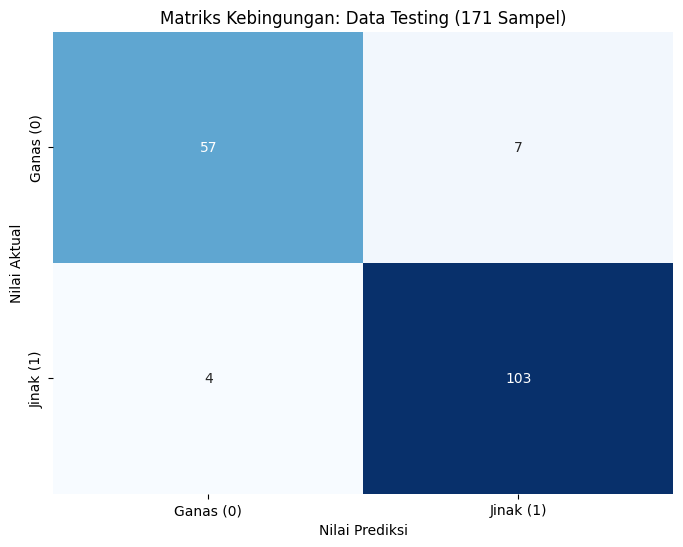

In [ ]:
# 7. Visualisasi Matriks Kebingungan
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=target_names,
    yticklabels=target_names,
    cbar=False
)
plt.title(f'Matriks Kebingungan: Data Testing ({len(X_test)} Sampel)')
plt.ylabel('Nilai Aktual')
plt.xlabel('Nilai Prediksi')
plt.show()

Kiri Atas	57	True Positive (TP)	Model dengan benar memprediksi 57 kasus sebagai Ganas (0).

Kanan Bawah	103	True Negative (TN)	Model dengan benar memprediksi 103 kasus sebagai Jinak (1).

Kanan Atas	7	False Negative (FN)	Kesalahan Kritis: Model salah memprediksi 7 kasus yang sebenarnya Ganas (0) sebagai Jinak (1).

Kiri Bawah	4	False Positive (FP)	Kesalahan Alarm Palsu: Model salah memprediksi 4 kasus yang sebenarnya Jinak (1) sebagai Ganas (0).

In [ ]:
from sklearn.metrics import classification_report

# 8. Hitung Matriks Kebingungan dan Laporan Klasifikasi
cm = confusion_matrix(y_test, y_pred)
target_names = ['Ganas (0)', 'Jinak (1)']

print("--- LAPORAN KLASIFIKASI ---")
print(classification_report(y_test, y_pred, target_names=target_names))

--- LAPORAN KLASIFIKASI ---
              precision    recall  f1-score   support

   Ganas (0)       0.93      0.89      0.91        64
   Jinak (1)       0.94      0.96      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



## **3. Evaluasi Model**

Berdasarkan Laporan Klasifikasi:
Model Gaussian Naive Bayes menunjukkan performa yang sangat baik dalam mengklasifikasikan diagnosis kanker payudara dengan akurasi keseluruhan 94%.

*   **Precision (Presisi)**:
    *   **Ganas (0): 0.93** - Dari semua yang diprediksi sebagai 'Ganas', 93% di antaranya benar-benar 'Ganas'. Ini menunjukkan model sangat baik dalam tidak salah mengklasifikasikan 'Jinak' sebagai 'Ganas'.
    *   **Jinak (1): 0.94** - Dari semua yang diprediksi sebagai 'Jinak', 94% di antaranya benar-benar 'Jinak'.

*   **Recall (Sensitivitas)**:
    *   **Ganas (0): 0.89** - Dari semua kasus 'Ganas' yang sebenarnya, model berhasil mengidentifikasi 89% di antaranya. Ini penting untuk memastikan tidak banyak kasus 'Ganas' yang terlewatkan (false negative).
    *   **Jinak (1): 0.96** - Dari semua kasus 'Jinak' yang sebenarnya, model berhasil mengidentifikasi 96% di antaranya.

*   **F1-Score**:
    *   **Ganas (0): 0.91** - Merupakan rata-rata harmonik dari presisi dan recall. Nilai 0.91 untuk kelas 'Ganas' menunjukkan keseimbangan yang baik antara presisi dan recall, yang krusial untuk diagnosis kanker.
    *   **Jinak (1): 0.95** - Menunjukkan performa yang sangat baik untuk kelas 'Jinak'.

*   **Support**:
    *   **Ganas (0): 64** - Jumlah sampel aktual yang berlabel 'Ganas' dalam data pengujian.
    *   **Jinak (1): 107** - Jumlah sampel aktual yang berlabel 'Jinak' dalam data pengujian.

*   **Accuracy (Akurasi): 0.94** - Secara keseluruhan, model memprediksi dengan benar 94% dari total sampel di data pengujian. Ini adalah metrik umum, namun untuk kasus kanker, presisi dan recall per kelas lebih informatif.

### **Kesimpulan Evaluasi:**

Model Gaussian Naive Bayes ini menunjukkan performa yang sangat baik dalam mengklasifikasikan diagnosis kanker payudara. Dengan akurasi keseluruhan 94%, model ini memiliki kemampuan tinggi untuk membedakan antara sel Ganas dan Jinak. Terutama, recall yang tinggi untuk kelas 'Jinak' (96%) dan recall yang cukup baik untuk kelas 'Ganas' (89%) mengindikasikan bahwa model ini cukup andal dalam mendeteksi kanker sekaligus meminimalkan kesalahan identifikasi sel sehat. Precision yang tinggi untuk kedua kelas juga menunjukkan bahwa model jarang membuat prediksi yang salah.

Performanya yang kuat ini menjadikannya alat pendukung keputusan yang potensial dalam membantu ahli medis.